# *Trabajo pŕactico organización de datos*

## 1.  Intoducción

Este trabajo consiste en realizar un análisis profundo sobre un determinado set de datos para de esta manera afianzar los contenídos vistos durante el curso. 
El trabajo se dividirá en diferentes secciones para facilitar su lectura y mantener un orden a la hora de sacar conclusiones.

## 2. Importación de librerías

En esta sección se importaran las librerías cuyas herramientas utilizaremos en el trancurso de todo el trabajo.

In [139]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#%matplotlib inline

#plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

#sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')


## 3. Lectura de datos y primeras impresiones

### 3.1 Lectura de los datos

Se dispone de un archivo csv que nos brinda información sobre propiedades en venta en el país de Mexico. Cada linea del archivo nos da información sobre una de las propiedades. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluída en el archivo. Se tratará a los datos como un Dataframe.

In [140]:
df = pd.read_csv('train.csv')

In [141]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### 3.2 Dimensiones del Dataframe

In [142]:
dimensiones= df.shape
print("Cantidad de filas:", dimensiones[0])
print("Cantidad de columnas:", dimensiones[1])
print("Tamaño del Dataframe:", df.size)

Cantidad de filas: 240000
Cantidad de columnas: 23
Tamaño del Dataframe: 5520000


### 3.3 Caracterísitcas principales del Dataframe

Se incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna. A su vez conocemos tambien los tipos de datos con los que estaremos trabjando.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## 4. Análisis de Datos

En las secciones anteriores se realizó la carga de los datos y se obtubo información general del Dataframe de manera tal de familiarizarnos con la información con la que se estará trabajando durante el trabajo práctico. A partir de ahora se comenzará con el análisis de dichos datos donde iremos explorando el Dataframe para obtener resultados que nos permitan sacar conclusiones sobre la venta de propiedades en México.

### 4.1 Cantidad de propiedades:

Es interesante conocer la cantidad de propiedades de la que disponemos. Como cada fila del Dataframe se corresponde con una propiedad, la cantidad de propiedades se corresponde con la cantidad de filas del dataframe:


In [144]:
print("Cantidad de propiedades:", dimensiones[0])

Cantidad de propiedades: 240000


### 4.2 Tipo de propiedades:

Las propiedades en venta pueden ser de diferentes tipos. A continuación se muestran cuales son los tipo de propiedadas con los que estaremos trabajando como tambien la cantidad de propiedades en venta de cada uno de ellos.

In [145]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

## 4.3 Ubicación de las propiedades

### 4.3.1 Cantidad de propiedades por provincia

Vimos que el set de datos se corresponde a propiedades en venta distribuídas en el país de México. Este país divide en provincias. Veamos cuantas propiedades hay por cada provincia:

In [146]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

### 4.3.2 Cantidad de propiedades por ciudad

Las provincias se dividen en ciudades. Veamos para cada provincia cuantas propiedades en venta hay en cada ciudad.

In [147]:
provincias = df["provincia"].dropna().unique()
for provincia in provincias:
    print( "\nPROVINCIA: " + str(provincia))
    datosfiltrados= df.loc[df.provincia == provincia, :]
    print(datosfiltrados["ciudad"].value_counts())
    print("TOTAL: " + str(datosfiltrados.shape[0]))


PROVINCIA: Distrito Federal
Benito Juárez             11013
Alvaro Obregón             6632
Cuauhtémoc                 6539
Miguel Hidalgo             5795
Tlalpan                    5721
Coyoacán                   5293
Gustavo A. Madero          3141
Iztapalapa                 3093
Cuajimalpa de Morelos      3020
Azcapotzalco               1972
La Magdalena Contreras     1905
Venustiano Carranza        1456
Xochimilco                 1360
Iztacalco                  1207
Tláhuac                     574
Milpa Alta                   27
otra                         22
Name: ciudad, dtype: int64
TOTAL: 58790

PROVINCIA: Jalisco
Zapopan                          10360
Guadalajara                       4006
Tlajomulco de Zúñiga              3254
Tlaquepaque                       1285
Puerto Vallarta                    832
Tonalá                             784
Chapala                            146
El Salto                            77
Jocotepec                           56
Tepatitlán de Mo

León                                                 1370
San Miguel de Allende                                 627
Irapuato                                              449
Celaya                                                146
Guanajuato                                            101
Silao                                                  39
Salamanca                                              26
Apaseo el Grande                                       17
San José Iturbide                                      16
Dolores Hidalgo Cuna de la Independencia Nacional       7
San Francisco del Rincón                                6
Moroleón                                                5
Apaseo el Alto                                          5
Uriangato                                               5
San Felipe                                              4
Abasolo                                                 4
Cortazar                                                4
Pénjamo       

Durango                 2048
Gómez Palacio            129
Lerdo                     68
Nombre de Dios             7
Vicente Guerrero           6
Santiago Papasquiaro       5
Canatlán                   5
Pánuco de Coronado         2
San Juan del Río           2
Nuevo Ideal                1
Poanas                     1
Name: ciudad, dtype: int64
TOTAL: 2275

PROVINCIA: Sinaloa
Culiacán             861
Mazatlán             747
Ahome                150
Guasave               17
Navolato              12
Sinaloa                7
Salvador Alvarado      3
El Fuerte              2
Rosario                2
Escuinapa              1
Concordia              1
San Ignacio            1
Angostura              1
Elota                  1
Name: ciudad, dtype: int64
TOTAL: 1806

PROVINCIA: Chiapas
Tuxtla Gutiérrez              871
San Cristóbal de las Casas    126
Tapachula                      36
Comitán de Domínguez           18
Berriozábal                    16
Chiapa de Corzo                14
Tonalá   

### 4.3.3 ¿Cuáles son las provincias con mayor cantidad de algún tipo de propiedad?

Es interesante conocer cuales son las provincias que tiene mayor cantidad de propiedades de algún tipo en específico en venta. A modo de ejemplo veamos el top 3 de las provincias con mayor cantidad de casas en venta.

In [63]:
print(" Las 3 provincias con mayor cantidad de casas en venta son: ")
df.loc[df.tipodepropiedad == "Casa", : ]["provincia"].value_counts().head(3)

 Las 3 provincias con mayor cantidad de casas en venta son: 


Edo. de México      25938
Distrito Federal    15812
Jalisco             14196
Name: provincia, dtype: int64

Otro ejemplo podría ser conocer cual es la provincia con mayor cantidad de huertas en venta.

In [67]:
print(" La provincia con mayor cantidad de Huertas en venta es:")
df.loc[df.tipodepropiedad == "Huerta", : ]["provincia"].value_counts().head(1)

 La provincia con mayor cantidad de Huertas en venta es:


Chihuahua    7
Name: provincia, dtype: int64

Supongamos ahora que queremos generalizarlo y calculemos para cada tipo de propiedad cuál es la provincia que tiene mayor cantidad de propiedades en venta de cada tipo.

In [138]:
tipos = df["tipodepropiedad"].dropna().unique()
for tipo in tipos:
    print ("\nTIPO: " + tipo)
    print(df.loc[df.tipodepropiedad == tipo, :]["provincia"].value_counts().head(1))


TIPO: Apartamento
Distrito Federal    33839
Name: provincia, dtype: int64

TIPO: Casa en condominio
Edo. de México    4717
Name: provincia, dtype: int64

TIPO: Casa
Edo. de México    25938
Name: provincia, dtype: int64

TIPO: Terreno
Distrito Federal    1677
Name: provincia, dtype: int64

TIPO: Terreno comercial
San luis Potosí    234
Name: provincia, dtype: int64

TIPO: Local Comercial
Distrito Federal    471
Name: provincia, dtype: int64

TIPO: Quinta Vacacional
Nuevo León    205
Name: provincia, dtype: int64

TIPO: Oficina comercial
Distrito Federal    736
Name: provincia, dtype: int64

TIPO: Edificio
Distrito Federal    616
Name: provincia, dtype: int64

TIPO: Casa uso de suelo
Distrito Federal    277
Name: provincia, dtype: int64

TIPO: Local en centro comercial
Jalisco    54
Name: provincia, dtype: int64

TIPO: Bodega comercial
Distrito Federal    322
Name: provincia, dtype: int64

TIPO: Otros
Querétaro    34
Name: provincia, dtype: int64

TIPO: Villa
Guerrero    90
Name: provin

### 4.3.4 Antiguedad de propiedades segun provincia

In [136]:
provincias= df['provincia'].dropna().unique()
dfaux= df.groupby(['provincia'])
for provincia in provincias:
    print ("\nProvincia: " + str(provincia))
    print( "promedio de antiguedad:" + str(dfaux.get_group(provincia)['antiguedad'].mean().round(2)) + " años")



Provincia: Distrito Federal
promedio de antiguedad:12.19 años

Provincia: Jalisco
promedio de antiguedad:6.64 años

Provincia: Edo. de México
promedio de antiguedad:10.03 años

Provincia: Oaxaca
promedio de antiguedad:5.4 años

Provincia: Quintana Roo
promedio de antiguedad:4.54 años

Provincia: Colima
promedio de antiguedad:5.67 años

Provincia: San luis Potosí
promedio de antiguedad:3.98 años

Provincia: Nuevo León
promedio de antiguedad:7.54 años

Provincia: Querétaro
promedio de antiguedad:3.7 años

Provincia: Tamaulipas
promedio de antiguedad:5.55 años

Provincia: Puebla
promedio de antiguedad:4.55 años

Provincia: Yucatán
promedio de antiguedad:3.07 años

Provincia: Morelos
promedio de antiguedad:6.46 años

Provincia: Guerrero
promedio de antiguedad:7.61 años

Provincia: Tabasco
promedio de antiguedad:5.3 años

Provincia: Guanajuato
promedio de antiguedad:5.73 años

Provincia: Hidalgo
promedio de antiguedad:3.47 años

Provincia: Veracruz
promedio de antiguedad:4.63 años

Provinc

In [ ]:
***************************HASTA ACA LLEGUÉ****************************************

In [ ]:
#ciudades = df['ciudad']
#ciudades.value_counts()

In [28]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [29]:
df.dropna(subset=['titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng']).isnull().sum()

id                            0
titulo                        0
descripcion                   0
tipodepropiedad               0
direccion                     0
ciudad                        0
provincia                     0
antiguedad                    0
habitaciones                  0
garages                       0
banos                         0
metroscubiertos               0
metrostotales                 0
idzona                        0
lat                           0
lng                           0
fecha                         0
gimnasio                      0
usosmultiples                 0
piscina                       0
escuelascercanas              0
centroscomercialescercanos    0
precio                        0
dtype: int64

In [30]:
df.memory_usage()

Index                              80
id                            1920000
titulo                        1920000
descripcion                   1920000
tipodepropiedad               1920000
direccion                     1920000
ciudad                        1920000
provincia                     1920000
antiguedad                    1920000
habitaciones                  1920000
garages                       1920000
banos                         1920000
metroscubiertos               1920000
metrostotales                 1920000
idzona                        1920000
lat                           1920000
lng                           1920000
fecha                         1920000
gimnasio                      1920000
usosmultiples                 1920000
piscina                       1920000
escuelascercanas              1920000
centroscomercialescercanos    1920000
precio                        1920000
dtype: int64

In [31]:
#df.astype({'gimnasio': 'category','usosmultiples': 'category','piscina': 'category','escuelascercanas': 'int32','centroscomercialescercanos': 'int32'}).dtypes


In [32]:
#df.dtypes

In [33]:
df.info()
#deberiamos castear datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [34]:
(df.memory_usage()/(1024*1024)).sum()

42.11433410644531

In [35]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,"240,000.00","196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,"149,969.38",8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35"
std,"86,634.58",9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80"
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00"
25%,"74,930.75",0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50"
50%,"149,875.50",5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00"
75%,"225,016.50",10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00"
max,"299,999.00",80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00"


In [36]:
precio_por_zona = df.groupby('provincia').agg({'precio': ['sum', 'mean', 'size']})
precio_por_zona

precio                            
                                       sum                 mean   size
provincia                                                             
Aguascalientes            2,589,511,913.00         1,477,188.77   1753
Baja California Norte     2,471,162,435.00           767,441.75   3220
Baja California Sur       2,067,969,797.00         1,216,452.82   1700
Campeche                    413,151,387.00         1,570,917.82    263
Chiapas                   2,166,565,561.00         1,924,125.72   1126
Chihuahua                 8,007,395,512.00         1,744,530.61   4590
Coahuila                  5,562,103,634.00         1,505,305.45   3695
Colima                    1,543,631,203.00         1,531,380.16   1008
Distrito Federal        204,101,541,990.00         3,471,705.09  58790
Durango                   2,753,634,936.00         1,210,388.98   2275
Edo. de México          114,937,877,614.00         2,762,464.91  41607
Guanajuato                5,339,503,977.00         1,866,959.43   2860
Guerrero                  6,825,530,692.00         2,548,741.86   2678
Hidalgo                   3,291,292,899.00         1,305,550.54   2521
Jalisco                  50,285,076,179.00         2,367,693.58  21238
Michoacán                 3,653,382,570.00         1,478,503.67   2471
Morelos                  16,802,375,724.00         2,290,088.01   7337
Nayarit                   1,929,021,194.00         1,426,790.82   1352
Nuevo León               41,646,918,301.00         2,717,757.65  15324
Oaxaca                    1,120,193,220.00         1,575,517.89    711
Puebla                   23,951,664,353.00         2,298,403.64  10421
Querétaro                36,424,121,914.00         2,144,108.90  16988
Quintana Roo             11,428,510,747.00         2,402,966.94   4756
San luis Potosí          16,221,829,633.00         1,920,424.96   8447
Sinaloa                   2,952,036,390.00         1,634,571.64   1806
Sonora                    4,433,342,980.00         1,483,715.86   2988
Tabasco                   2,286,677,345.00         2,300,480.23    994
Tamaulipas                3,661,003,051.00         1,589,666.98   2303
Tlaxcala                    906,953,413.00         1,080,993.34    839
Veracruz                 10,888,961,462.00         1,889,788.52   5762
Yucatán                  16,141,565,288.00         2,036,019.84   7928
Zacatecas                   136,652,293.00         1,453,747.80     94

In [37]:
precio_por_zona.columns = ['precio_sum', 'precio_mean','size']
precio_por_zona

,precio_sum,precio_mean,size
provincia,,,
Aguascalientes,"2,589,511,913.00","1,477,188.77",1753
Baja California Norte,"2,471,162,435.00","767,441.75",3220
Baja California Sur,"2,067,969,797.00","1,216,452.82",1700
Campeche,"413,151,387.00","1,570,917.82",263
Chiapas,"2,166,565,561.00","1,924,125.72",1126
Chihuahua,"8,007,395,512.00","1,744,530.61",4590
Coahuila,"5,562,103,634.00","1,505,305.45",3695
Colima,"1,543,631,203.00","1,531,380.16",1008
Distrito Federal,"204,101,541,990.00","3,471,705.09",58790


In [38]:
precio_por_zona.sort_values('precio_mean', ascending=False).head(3) #esto de todas, podriamos hacer otro para 
#cada propiedad, casas por ejemplo

,precio_sum,precio_mean,size
provincia,,,
Distrito Federal,"204,101,541,990.00","3,471,705.09",58790
Edo. de México,"114,937,877,614.00","2,762,464.91",41607
Nuevo León,"41,646,918,301.00","2,717,757.65",15324


In [39]:
#precio_por_zona.first()
df.nlargest(5, ['antiguedad','habitaciones'])


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
97548,257892,"col. san rafael, deleg. cuauhtemoc, d.f. casa ...",<p class=default>&nbsp;hermosa casa estilo art...,Casa,"FRANCISCO PIMENTEL, COL. SAN RAFAEL, DELEG. CU...",Cuauhtémoc,Distrito Federal,80.00,10.00,0.00,...,"23,835.00",19.44,-99.16,2013-06-10 00:00:00,1.00,0.00,0.00,1.00,1.00,"4,500,000.00"
140684,128365,vendo casa antigua en pleno centro de xalapa,<p>casa antigua ideal para un hotel boutique c...,Casa,Centro Histórico de Xalapa,Xalapa,Veracruz,80.00,6.00,2.00,...,"106,805.00",19.04,-98.20,2013-01-29 00:00:00,0.00,0.00,0.00,1.00,1.00,"5,550,000.00"
205970,91196,NaN,casa antigua restaurada e intervenida con uso ...,Casa,DURANGO,Cuauhtémoc,Distrito Federal,80.00,6.00,0.00,...,"50,003,998.00",nan,nan,2013-12-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"6,300,000.00"
17187,184029,casa sola en venta,"<p>entre jaime nuno y ricardo castro, en buen ...",Casa,ALFONSO ESPARZA OTEO,Alvaro Obregón,Distrito Federal,80.00,5.00,nan,...,"23,138.00",19.36,-99.19,2013-10-04 00:00:00,0.00,0.00,0.00,1.00,0.00,"7,900,000.00"
123602,142971,en pleno centro historico,"<p>zahuan,pasillo (sin techar) sala-comedor, c...",Casa,NaN,San Luis Potosí,San luis Potosí,80.00,5.00,0.00,...,"87,460.00",nan,nan,2013-09-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,300,000.00"


In [40]:
#df.plot.bar('habitaciones','precio') congela la computadora


#Hacer grafico

#print(f"Promedio de precio por provincias: {df.provincia.nunique()}")
#precio_por_zona.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");


#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
#df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70,mtitle="Cantidad de propiedades por tipo de propiedad");

In [41]:
df.groupby('precio').agg(np.sum)
#el primero elemento tiene 1400 años de antiguedad, raro

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos
precio,,,,,,,,,,,,,,,
"310,000.00",40233830,"1,466.00",447.00,224.00,238.00,"13,300.00","18,538.00","65,878,998.00","2,822.06","-12,610.09",1.00,4.00,2.00,126.00,103.00
"310,600.00",252823,0.00,2.00,0.00,1.00,42.00,68.00,0.00,19.76,-101.20,0.00,0.00,0.00,0.00,0.00
"310,808.00",254621,0.00,0.00,0.00,1.00,50.00,105.00,"252,563.00",32.49,-116.99,0.00,0.00,0.00,0.00,0.00
"311,000.00",911180,5.00,13.00,4.00,6.00,372.00,586.00,"606,146.00",132.84,-604.55,1.00,3.00,0.00,5.00,5.00
"311,250.00",17629,0.00,2.00,0.00,1.00,85.00,91.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"311,300.00",204534,0.00,5.00,1.00,3.00,304.00,126.00,"35,100.00",61.19,-210.78,0.00,0.00,0.00,0.00,0.00
"311,440.00",142752,5.00,2.00,1.00,1.00,52.00,0.00,"57,506.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"311,500.00",4358,1.00,2.00,1.00,1.00,50.00,0.00,"58,274.00",19.66,-99.01,1.00,1.00,0.00,1.00,1.00
"312,000.00",2221583,43.00,24.00,9.00,13.00,989.00,726.00,"1,101,986.00",83.30,-395.73,0.00,0.00,1.00,5.00,4.00


In [42]:
df3 = df.loc[df.antiguedad > 100.00]
#40233830
df3.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio


In [43]:
# agrupando usando multiples columnas
grouped = df.groupby(['provincia','ciudad'])\
    .agg({'habitaciones':['mean','sum'],'precio':'mean', 'antiguedad':'mean'}) #poner parametros mas
                                                            #interesantes que habitaciones y antiguedad
grouped

habitaciones  \
                                                                mean   
provincia             ciudad                                           
Aguascalientes        Aguascalientes                            3.15   
                      Asientos                                  3.00   
                      Calvillo                                  4.00   
                      Cosío                                     3.67   
                      El Llano                                  3.00   
                      Jesús María                               2.81   
                      Pabellón de Arteaga                       3.00   
                      Rincón de Romos                           3.00   
                      San Francisco de los Romo                 2.12   
                      Tepezalá                                  2.33   
Baja California Norte Ensenada                                  2.74   
                      Mexicali                                  2.76   
                      Playas de Rosarito                        2.72   
                      Tecate                                    2.12   
                      Tijuana                                   2.56   
Baja California Sur   Comondú                                   2.00   
                      La Paz                                    2.65   
                      Loreto                                    2.33   
                      Los Cabos                                 2.62   
                      Mulegé                                    4.00   
Campeche              Calkiní                                   2.33   
                      Campeche                                  2.71   
                      Carmen                                    3.06   
                      Champotón                                 2.33   
                      Escárcega                                  nan   
                      Hopelchén                                  nan   
                      Palizada                                   nan   
Chiapas               Bella Vista                               2.00   
                      Berriozábal                               2.86   
                      Chiapa de Corzo                           2.67   
...                                                              ...   
Yucatán               Suma                                      3.00   
                      Tahmek                                     nan   
                      Teabo                                     2.00   
                      Tekax                                     4.00   
                      Telchac Pueblo                            2.33   
                      Telchac Puerto                            3.38   
                      Temax                                      nan   
                      Temozón                                   2.90   
                      Timucuy                                   2.00   
                      Tinum                                      nan   
                      Tizimín                                   2.17   
                      Tzucacab                                   nan   
                      Uayma                                      nan   
                      Ucú                                       6.00   
                      Umán                                      2.62   
                      Valladolid                                2.60   
                      Yaxcabá                                   6.00   
                      Yaxkukul                                  4.00   
                      Yobaín                                    2.50   
Zacatecas             Calera                                    3.00   
                      Fresnillo                                 4.00   
                      Guadalupe                                 2.85   
                      Je

In [44]:
tamaño_por_zona = df.groupby('provincia').agg({'metrostotales': ['sum', 'mean', 'size']})
tamaño_por_zona.columns = ['metros_sum', 'metros_mean','size']
tamaño_por_zona.sort_values('metros_mean', ascending=False)

#hacer grafico y luego otro grafico que muestre la relacion entre el tamaño y el precio

,metros_sum,metros_mean,size
provincia,,,
Yucatán,"1,530,094.00",261.06,7928
Chihuahua,"855,017.00",213.81,4590
Morelos,"988,582.00",209.62,7337
Coahuila,"682,032.00",208.89,3695
Campeche,"46,865.00",204.65,263
Sonora,"527,249.00",196.22,2988
Querétaro,"2,824,860.00",193.44,16988
Quintana Roo,"667,887.00",189.26,4756
Durango,"389,575.00",184.11,2275


In [45]:
antiguedad_por_zona = df.groupby('provincia').agg({'antiguedad': ['sum', 'mean', 'size']})
antiguedad_por_zona.columns = ['antiguedad_sum', 'antiguedad_mean','size']
antiguedad_por_zona.sort_values('antiguedad_mean', ascending=False)

#Este no parece tan util pero necesitamos ver la relacion entre antiguedad/precio
#hacer grafico y luego otro grafico que muestre la relacion entre la antiguedad/precio

,antiguedad_sum,antiguedad_mean,size
provincia,,,
Distrito Federal,"630,800.00",12.19,58790
Edo. de México,"376,249.00",10.03,41607
Guerrero,"18,284.00",7.61,2678
Nuevo León,"85,133.00",7.54,15324
Aguascalientes,"11,633.00",7.52,1753
Michoacán,"12,343.00",7.06,2471
Jalisco,"119,008.00",6.64,21238
Chihuahua,"18,805.00",6.52,4590
Morelos,"37,963.00",6.46,7337


In [46]:
df2 = df.loc[df.tipodepropiedad == 'Apartamento']
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57341 entries, 0 to 239999
Data columns (total 23 columns):
id                            57341 non-null int64
titulo                        56119 non-null object
descripcion                   57026 non-null object
tipodepropiedad               57341 non-null object
direccion                     47851 non-null object
ciudad                        57264 non-null object
provincia                     57300 non-null object
antiguedad                    48290 non-null float64
habitaciones                  56347 non-null float64
garages                       53605 non-null float64
banos                         56004 non-null float64
metroscubiertos               56518 non-null float64
metrostotales                 29348 non-null float64
idzona                        52779 non-null float64
lat                           30035 non-null float64
lng                           30035 non-null float64
fecha                         57341 non-null objec

In [47]:
df2.shape

(57341, 23)

In [48]:
#fecha, fecha de que? de que se puso a la venta? de que se compró? o que? 

In [49]:
#relacion entre latitud y longitud con el precio

In [50]:
#comparacion entre el precio de las casas y los departamentos

In [51]:
#

Text(0.5, 1.0, 'Cantidad de propiedades segun su clase')

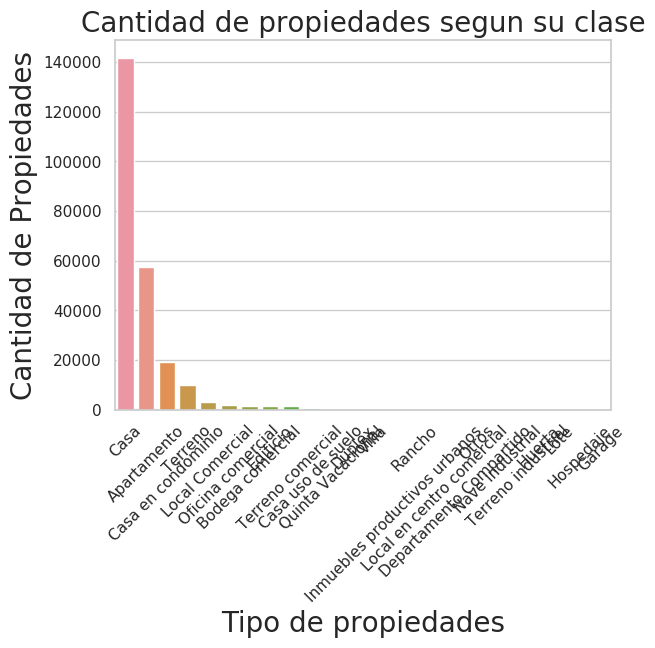

In [52]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipodepropiedad', data=df, order=df['tipodepropiedad'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Tipo de propiedades", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Propiedades", fontsize=20)
workday_announcements.set_title("Cantidad de propiedades segun su clase", fontsize=20)

#Es un buen comienzo(?)

Total tipos de propiedad: 24


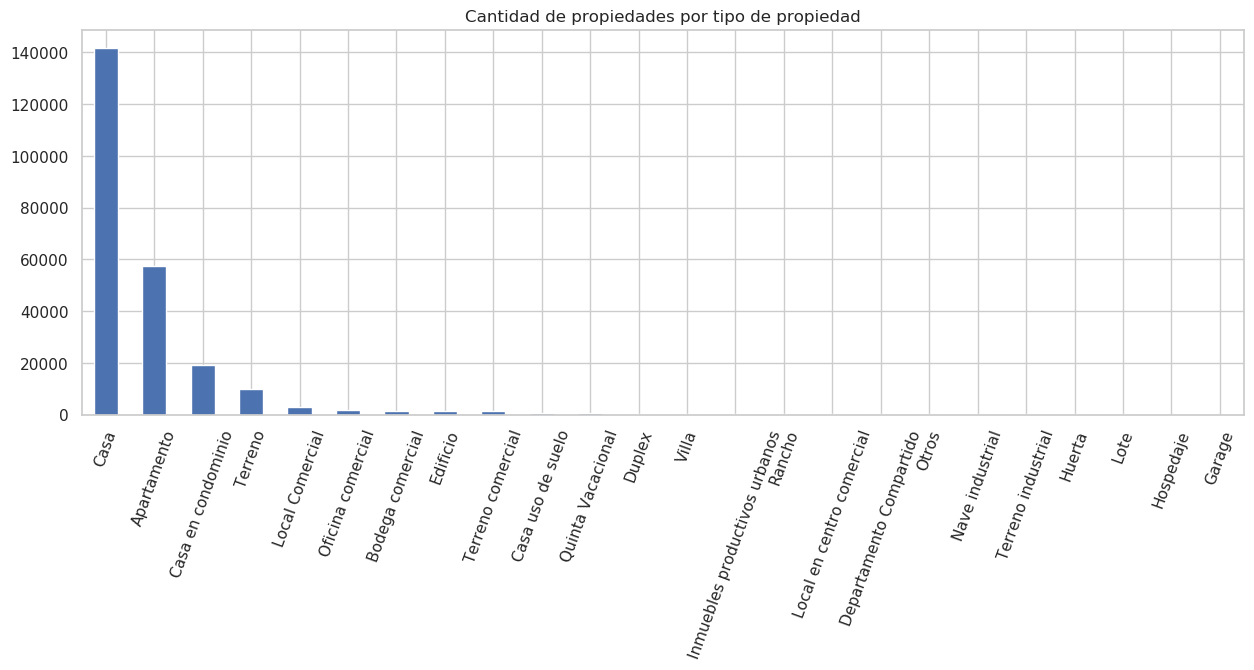

In [53]:
print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");
#roba3

Total de provincias: 32


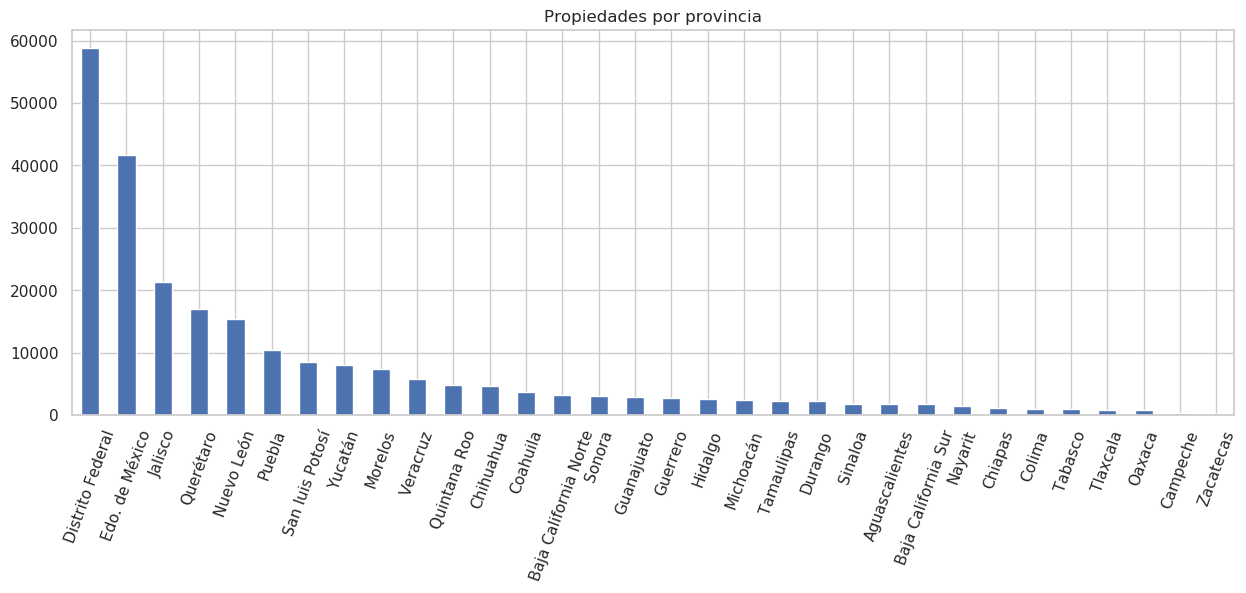

In [54]:
print(f"Total de provincias: {df.provincia.nunique()}")
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");
#robado parte 2

In [55]:
# analicemos distribución de avisos por seniority

#seniority_types = sns.countplot(x='ciudad', data=df, order=df['ciudad'].value_counts().index, orient='v')
#seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
#seniority_types.set_xlabel("Ciudades", fontsize=20)
#seniority_types.set_ylabel("Cantidad de propiedades por ciudad", fontsize=20)
#seniority_types.set_title("Propiedades por ciudad", fontsize=20)

#Horrible

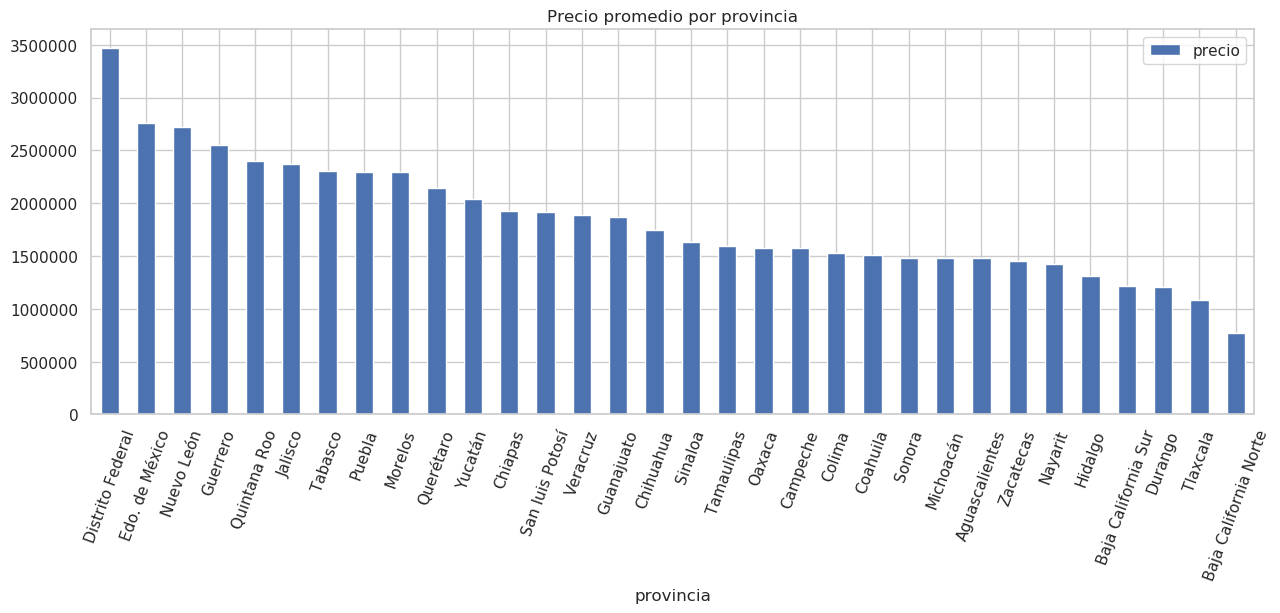

In [56]:
df.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia");

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


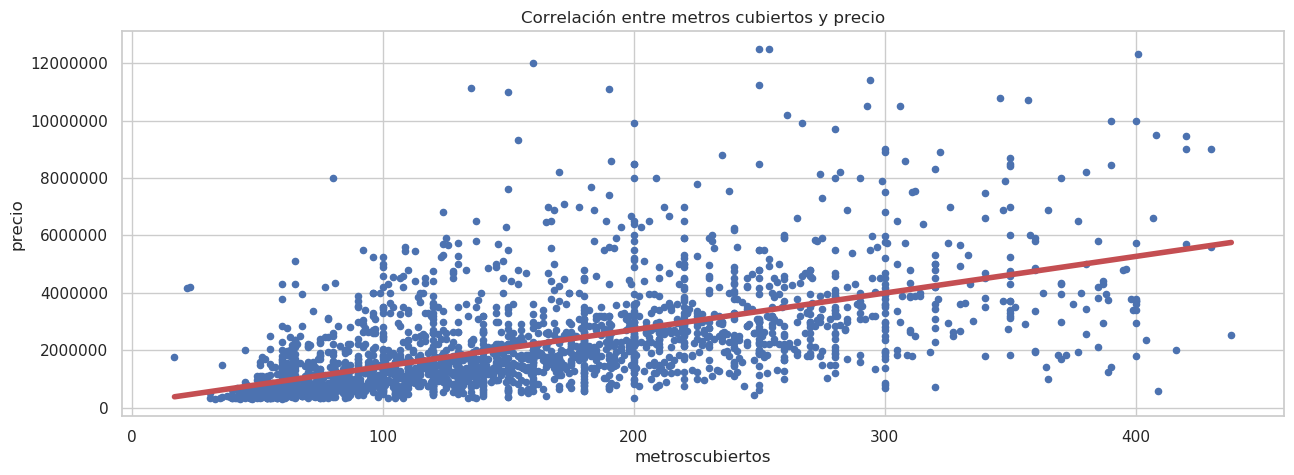

In [57]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);
